## Week 2 mini Assignment - regular

In [111]:
import numpy as np
import pandas as pd
import time as time
import matplotlib as mpl
import matplotlib.pyplot as plt

### 1. We will again generate random data for this assignment.  Please set up five data arrays of length 5,000, 10,000, 15,000, 20,000, and 25,000 of uniformly distributed random numbers (you may use either integers or floating point).  Ensure that a common random number seed is used to generate each of the arrays. 

In [112]:
# Create 5 uniformly distributed integers with size from 512, 1024, 2048, 4096 to 8192
# Create an array containing the size of these 5 random number arrays
np.random.seed(20200118)
df1 = list(np.random.randint(low = 1, high = 10000, size = 5000))
df2 = list(np.random.randint(low = 1, high = 10000, size = 10000))
df3 = list(np.random.randint(low = 1, high = 10000, size = 15000))
df4 = list(np.random.randint(low = 1, high = 10000, size = 20000))
df5 = list(np.random.randint(low = 1, high = 10000, size = 25000))
len_array = np.array([len(df1), len(df2),len(df3), len(df4),len(df5)])
len_array

array([ 5000, 10000, 15000, 20000, 25000])

### 2. Execute the base algorithm (Selection Sort) for each of the random number arrays, noting the execution time with each execution. Use one of the timing methods we learned in class.

In [113]:
# Finds the smallest value in an array
def findSmallest(array1):
    # Stores the smallest value
    smallest = array1[0]
    # Stores the index of the smallest value
    smallest_index = 0
    for i in range(1, len(array1)):
        if array1[i] < smallest:
            smallest_index = i
            smallest = array1[i]
    return smallest_index

# Sort array
def selectionSort(array1):
    newArr = []
    for i in range(len(array1)):
        # Finds the smallest element in the array and adds it to the new array
        smallest = findSmallest(array1)
        newArr.append(array1.pop(smallest))
    return newArr

In [114]:
# Sorting these 5 arrays and recording times for sorting in miliseconds
# putting recorded sorting time into an array
sort_time = np.array([])
n = 0
for j in [df1, df2, df3, df4, df5]:
    n += 1
    start = time.time()
    filename = 'df_' + str(n)
    filename1 = 'df_' + str(n)
    filename = selectionSort(j)
    end= time.time()
    sorting = round((end - start)*1000, 4)
    print('selection sort on array {0} is {1} miliseconds'.format(filename1,sorting))
    sort_time = np.append(sort_time, sorting)

selection sort on array df_1 is 914.0522 miliseconds
selection sort on array df_2 is 3678.2103 miliseconds
selection sort on array df_3 is 8336.4768 miliseconds
selection sort on array df_4 is 14733.8428 miliseconds
selection sort on array df_5 is 23068.3193 miliseconds


### 3. Just as in the last assignment, please organize the results of the study into a table showing the size of data array and the time taken to sort the array. Discuss the differences in timing and how they relate to data type and length of array.  

In [115]:
# Create a pandas dataframe to put all arrays together. 
data = {'len_array': len_array, 'sel_sort_time': sort_time}
df = pd.DataFrame(data)
df = df.round(decimals = 1)
df.head()

,len_array,sel_sort_time
0,5000,914.1
1,10000,3678.2
2,15000,8336.5
3,20000,14733.8
4,25000,23068.3


### Discussion: The results is showing a positive coorelation between size of lists and time needed for selection sort. if look down the plotted chart, the linear relationship is not very strong, curve has a little bit polynomial. Transformation might be needed if linear regression wants to be applied. 

### 4. Use Python matplotlib or Seaborn to generate a measure of the size of the data set on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution time against problem size for each form of the algorithm being tested.

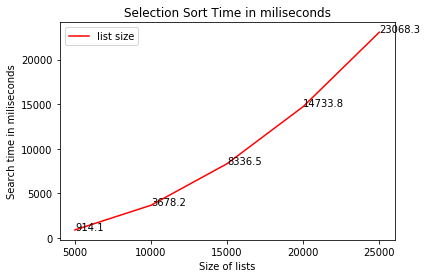

In [116]:
fig = plt.figure()
ax  = plt.axes()

# x axis is array size
x = df['len_array']
y1 = df['sel_sort_time']
plt.plot(x, y1, 'r', linestyle ='solid', label='list size')
plt.title("Selection Sort Time in miliseconds")
plt.xlabel("Size of lists")
plt.ylabel("Search time in miliseconds")
plt.xticks(np.arange(5000, 26000, 5000))
plt.legend()
for p, txt in enumerate(y1):
    ax.annotate(txt, (x[p], y1[p]))

#### Discussion: This weeks test is having the same conclusion as of last week. the size difference among 5 random generated arrays is even, and the number of the size is large enough. Hence the trend or linearity is more clear. The larger the size is, the greater the search time is. Linear search has greater slope which means array size impact is more clear. Sorting time's linearity relative to array size is not very clear. 

### Executive Summary

### Logic behind selection sort is to make a loop for the target list, each cycle, the code will pick the desired record (in this assignment, it is the smallest number), and remove this smallest number from the list and put it to the new list. The next cycle will do the same thing on the new list (one record less than last cycle) to determine the desire record and do the same operation. As loop goes on, the orignal list size will lose 1 in each cycle until the last. While the new list is adding one record from each cycle and the record is sorted based on desired interest. 

### From the testing time based on size of list, the positive correlation indicates the greater size the list has, the longer time the selection sort will need. The curve shape indicate a not pure linear relationship (polynomial might be better to fit). The slope is more flat when list size is small and becomes greater when list size increases. Transformation might be needed for linear regression between sort time and list size.

### After comparing four different data types including integer, floating, length 5 string and length 15 string about sorting times using pre-designed selection sort. The results seems to be listed below:
### 1. string sorting is more efficient and faster than numeric sorting.
### 2. string sorting time is also string length related. The longer the string is, the more time needed for sorting
### 3. integer sorting is faster than float sorting, float type sorting is the slowest one among all tested types
### 4. Within each of 4 types of arrays, the sorting time is relying on the size of the arrays. The greater size an array has , the more time it will need for sorting. 